In [1]:
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family']='Malgun Gothic'

In [2]:
pd.read_csv('./data/국민건강보험공단_건강검진정보_2023.csv',encoding='cp949').columns

Index(['기준년도', '가입자일련번호', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5cm단위)',
       '체중(5kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상',
       '치석'],
      dtype='object')

In [3]:
medical = pd.read_csv('./data/국민건강보험공단_건강검진정보_2023.csv',encoding='cp949')

In [18]:
medical['연령대'] = medical['연령대코드(5세단위)'] * 5 - 3
medical['연령대'] = (medical['연령대'] // 10) * 10
medical['콜레스테롤검사'] = np.where(medical['총콜레스테롤'].isnull(), 0, 1)

In [19]:
medical = medical.drop(['기준년도','가입자일련번호','시도코드','연령대코드(5세단위)'],axis=1)

KeyError: "['기준년도', '가입자일련번호', '시도코드', '연령대코드(5세단위)'] not found in axis"

In [20]:
df = medical.copy()

In [21]:
color_map = {
    1: '#00C9A7',   # 남성
    2: '#9D75CB'    # 여성
}

In [26]:
color_col = {
    '신장(5cm단위)': '#1f77b4',         # 파랑
    '체중(5kg단위)': '#ff7f0e',         # 주황
    '허리둘레': '#2ca02c',              # 초록
    '수축기혈압': '#d62728',            # 빨강
    '이완기혈압': '#9467bd',            # 보라
    '식전혈당(공복혈당)': '#8c564b',     # 갈색
    '총콜레스테롤': '#e377c2',          # 분홍
    '트리글리세라이드': '#7f7f7f',       # 회색
    'HDL콜레스테롤': '#bcbd22',         # 연두
    'LDL콜레스테롤': '#17becf',         # 청록
    '혈색소': '#aec7e8',                # 연파랑
    '요단백': '#ffbb78',               # 살구
    '혈청크레아티닌': '#98df8a',        # 연초록
    '혈청지오티(AST)': '#ff9896',       # 연분홍
    '혈청지피티(ALT)': '#c5b0d5',       # 연보라
    '감마지티피': '#c49c94'             # 베이지
}

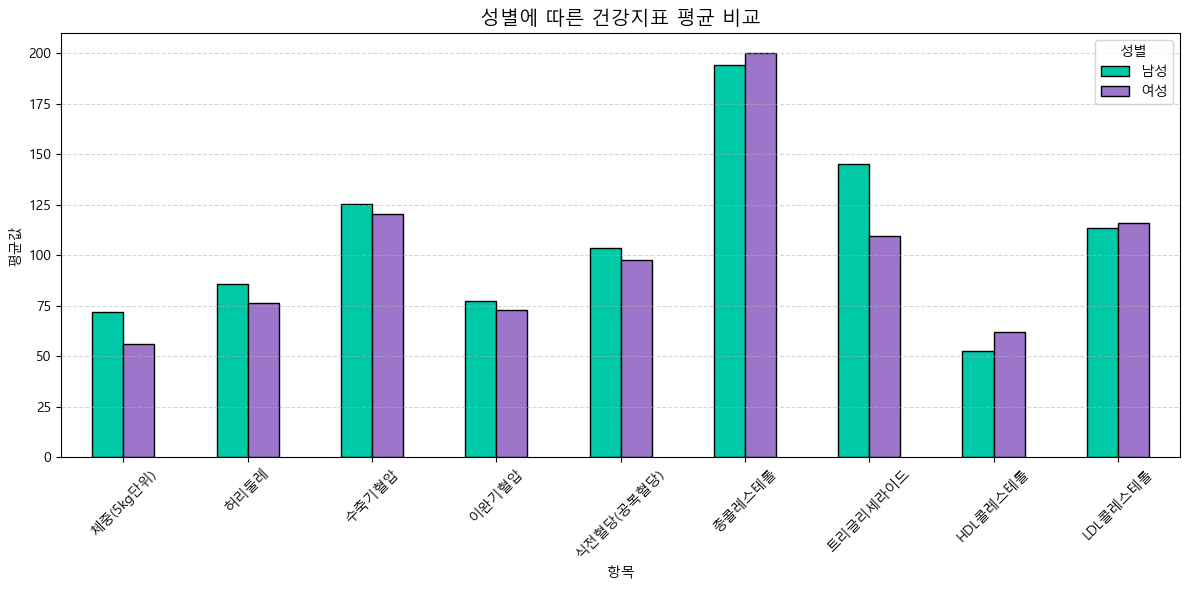

In [22]:
# 성별코드: 1 - 남성, 2 - 여성
gender_mean = df.groupby('성별코드')[['체중(5kg단위)', '허리둘레', '수축기혈압', '이완기혈압',
                                    '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드',
                                    'HDL콜레스테롤', 'LDL콜레스테롤']].mean()

# 막대그래프 그리기 (색 고정)
ax = gender_mean.T.plot(
    kind='bar',
    figsize=(12, 6),
    color=color_map,  # 성별 순서에 맞는 색상
    edgecolor='black'
)

plt.title('성별에 따른 건강지표 평균 비교', fontsize=14)
plt.ylabel('평균값')
plt.xlabel('항목')
plt.xticks(rotation=45)
plt.legend(title='성별', labels=['남성', '여성'])  # 성별 코드가 1, 2 순서라고 가정
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [37]:
color_col['수축기혈압']

'#d62728'

In [44]:
연령대_순서 = [0, 10, 20, 30, 40, 50, 60, 70, 80]

# 평균 계산
bp_by_age = df.groupby('연령대')[['수축기혈압', '이완기혈압']].mean()

# 연령대 순서대로 정렬
bp_by_age = bp_by_age.reindex(연령대_순서)

plt.figure(figsize=(10, 6))

for col in ['수축기혈압', '이완기혈압']:
    plt.plot(
        bp_by_age.index,
        bp_by_age[col],
        label=col,
        marker='o',
        color=color_col[col]  # 색상 딕셔너리에서 꺼내기
    )

plt.title('연령대별 수축기/이완기 혈압 평균', fontsize=15)
plt.xlabel('연령대')
plt.ylabel('혈압 (mmHg)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

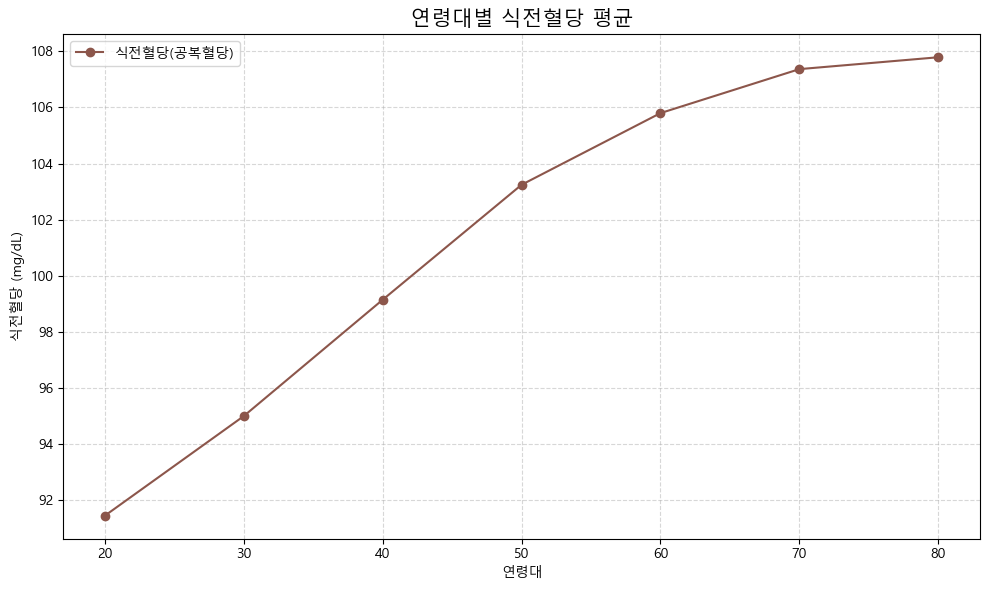

In [40]:
# 식전혈당 평균 계산
sugar_by_age = df.groupby('연령대')['식전혈당(공복혈당)'].mean()

# 순서 정렬
sugar_by_age = sugar_by_age.reindex(연령대_순서)

plt.figure(figsize=(10, 6))

plt.plot(
    sugar_by_age.index,
    sugar_by_age.values,
    marker='o',
    color=color_col['식전혈당(공복혈당)'],
    label='식전혈당(공복혈당)'
)

plt.title('연령대별 식전혈당 평균', fontsize=15)
plt.xlabel('연령대')
plt.ylabel('식전혈당 (mg/dL)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

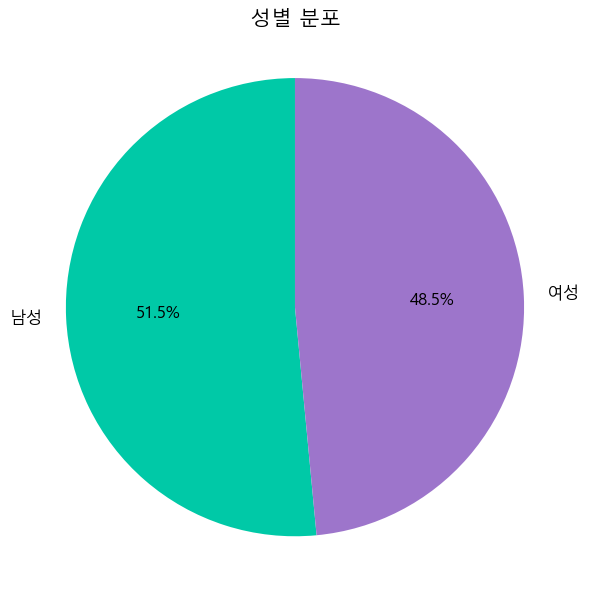

In [41]:
# 성별별 비율 계산
gender_counts = df['성별코드'].value_counts()

# 성별 이름이 숫자면 → 문자로 매핑
gender_labels = gender_counts.index.map({1: '남성', 2: '여성'})

# 색상 예쁘게 (남성: 민트, 여성: 보라)
colors = ['#00C9A7', '#9D75CB']

# 원그래프 그리기
plt.figure(figsize=(6, 6))
plt.pie(
    gender_counts,
    labels=gender_labels,
    autopct='%.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12}
)
plt.title('성별 분포', fontsize=15)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [49]:
color_age = {
    '20': '#fb8072',   # 코랄
    '30': '#b3cde3',   # 파스텔 블루
    '40': '#ccebc5',   # 민트
    '50': '#decbe4',   # 연보라
    '60': '#fed9a6',   # 살구
    '70': '#bc80bd',   # 진보라
    '80': '#80b1d3'    # 중간 블루 (코랄과 구분됨)
}

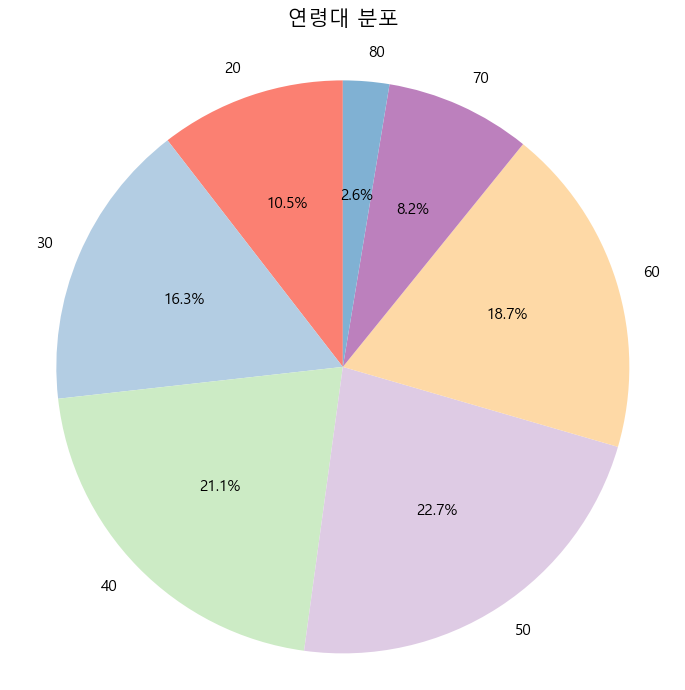

In [52]:
# 연령대 값이 숫자면 문자열로 변환해서 키로 사용
labels = age_counts.index.astype(str)
colors = [color_age[label] for label in labels]

plt.figure(figsize=(7, 7))
plt.pie(
    age_counts,
    labels=labels,
    autopct='%.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 11}
)
plt.title('연령대 분포', pad=20, fontsize=15)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [56]:
# 연령대 순서 정의 (필요시)
연령대_순서 = ['20', '30', '40', '50', '60', '70', '80']

# 평균 계산
creatinine_by_age = df.groupby('연령대')['혈청크레아티닌'].mean()

# 연령대 정렬
creatinine_by_age.index = creatinine_by_age.index.astype(str)
creatinine_by_age = creatinine_by_age.reindex(연령대_순서)

plt.figure(figsize=(8, 5))
plt.plot(
    creatinine_by_age.index,
    creatinine_by_age.values,
    marker='o',
    color=color_col['혈청크레아티닌'],
    label='혈청크레아티닌'
)

plt.title('연령대별 혈청크레아티닌 평균', fontsize=14)
plt.xlabel('연령대')
plt.ylabel('혈청크레아티닌 수치 (mg/dL)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

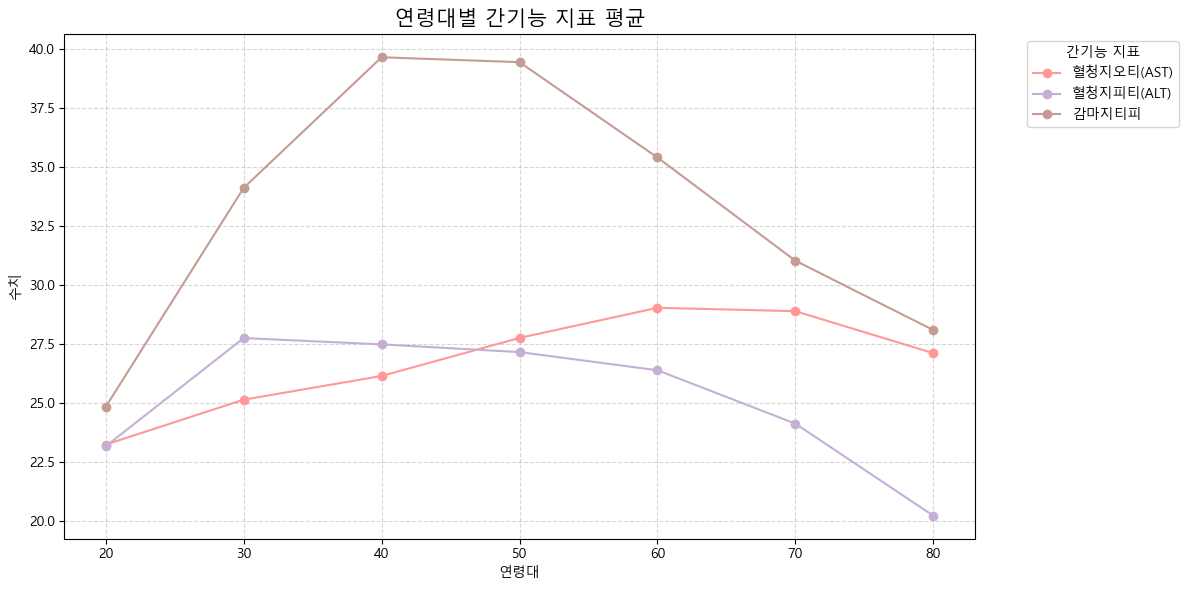

In [55]:
# 연령대 순서 고정 (예: 문자열일 경우)
연령대_순서 = ['20', '30', '40', '50', '60', '70', '80']

# 평균 계산
liver_by_age = df.groupby('연령대')[['혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피']].mean()

# 연령대 정렬 (인덱스가 숫자일 경우 str로 변환해서 맞춰주기)
liver_by_age.index = liver_by_age.index.astype(str)
liver_by_age = liver_by_age.reindex(연령대_순서)

plt.figure(figsize=(12, 6))

for col in ['혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피']:
    plt.plot(
        liver_by_age.index,
        liver_by_age[col],
        label=col,
        marker='o',
        color=color_col[col]  # 미리 정의한 색상 딕셔너리 사용
    )

plt.title('연령대별 간기능 지표 평균', fontsize=15)
plt.xlabel('연령대')
plt.ylabel('수치')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='간기능 지표', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [58]:
# 연령대 순서 고정
연령대_순서 = ['20', '30', '40', '50', '60', '70', '80']

# 평균 계산
weight_by_age = df.groupby('연령대')[['체중(5kg단위)', '허리둘레']].mean()

# 정렬
weight_by_age.index = weight_by_age.index.astype(str)
weight_by_age = weight_by_age.reindex(연령대_순서)

plt.figure(figsize=(10, 6))

for col in ['체중(5kg단위)', '허리둘레']:
    plt.plot(
        weight_by_age.index,
        weight_by_age[col],
        label=col,
        marker='o',
        color=color_col[col]  # 미리 정의한 컬러 딕셔너리에서 가져오기
    )

plt.title('연령대별 체중 및 허리둘레 평균 비교', fontsize=15)
plt.xlabel('연령대')
plt.ylabel('평균 수치')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='항목', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

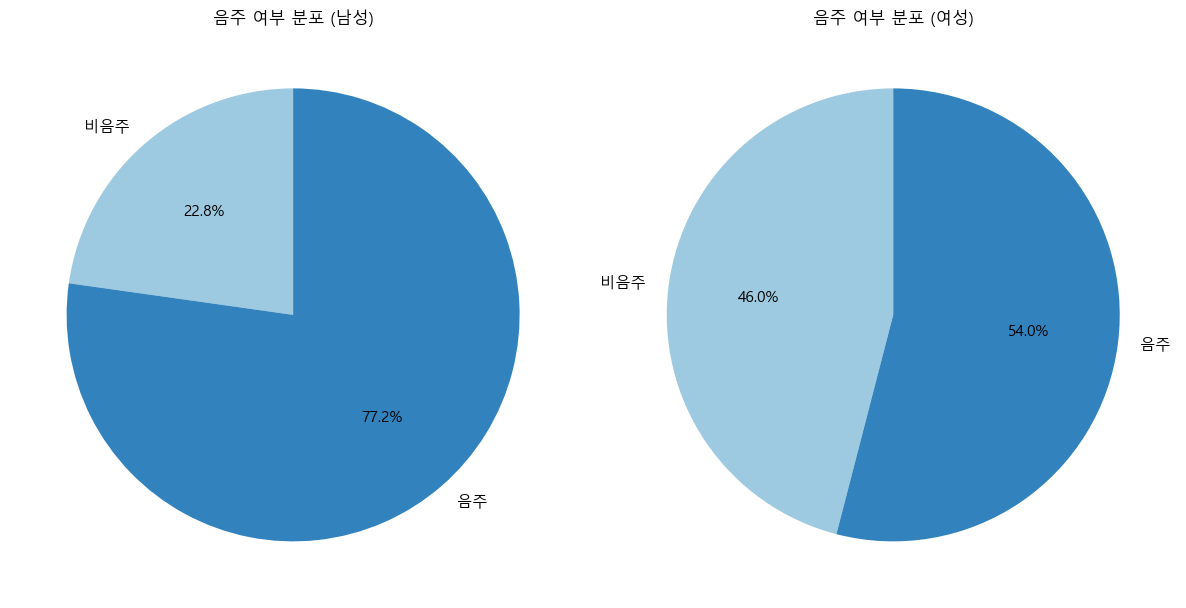

In [77]:
# 흡연상태 예시 매핑 (0: 비흡연, 1: 과거흡연, 2: 현재흡연 등등)
smoke_map = {0: '비흡연', 1: '비흡연', 2: '흡연'}
drink_map = {0: '비음주', 1: '음주'}

df['흡연상태_라벨'] = df['흡연상태'].map(smoke_map)
df['음주여부_라벨'] = df['음주여부'].map(drink_map)

# 성별 라벨도 설정
df['성별'] = df['성별코드'].map({1: '남성', 2: '여성'})

def draw_pie_by_gender(df, column, title_prefix, color_map=None):
    genders = ['남성', '여성']
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    for i, gender in enumerate(genders):
        counts = df[df['성별'] == gender][column].value_counts().sort_index()
        labels = counts.index
        colors = [color_map[label] for label in labels] if color_map else None

        axes[i].pie(
            counts,
            labels=labels,
            autopct='%.1f%%',
            startangle=90,
            textprops={'fontsize': 11},
            colors=colors
        )
        axes[i].set_title(f'{title_prefix} ({gender})')

    plt.tight_layout()
    plt.show()

# 흡연상태 색상
smoke_colors = {
    '비흡연': '#fc9272',
    '비흡연': '#fc9272',
    '흡연': '#de2d26'
}

# 음주여부 색상
drink_colors = {
    '비음주': '#9ecae1',
    '음주': '#3182bd'
}

# 1. 성별에 따른 흡연 상태
draw_pie_by_gender(df, '흡연상태_라벨', '흡연 상태 분포', color_map=smoke_colors)

# 2. 성별에 따른 음주 여부
draw_pie_by_gender(df, '음주여부_라벨', '음주 여부 분포', color_map=drink_colors)

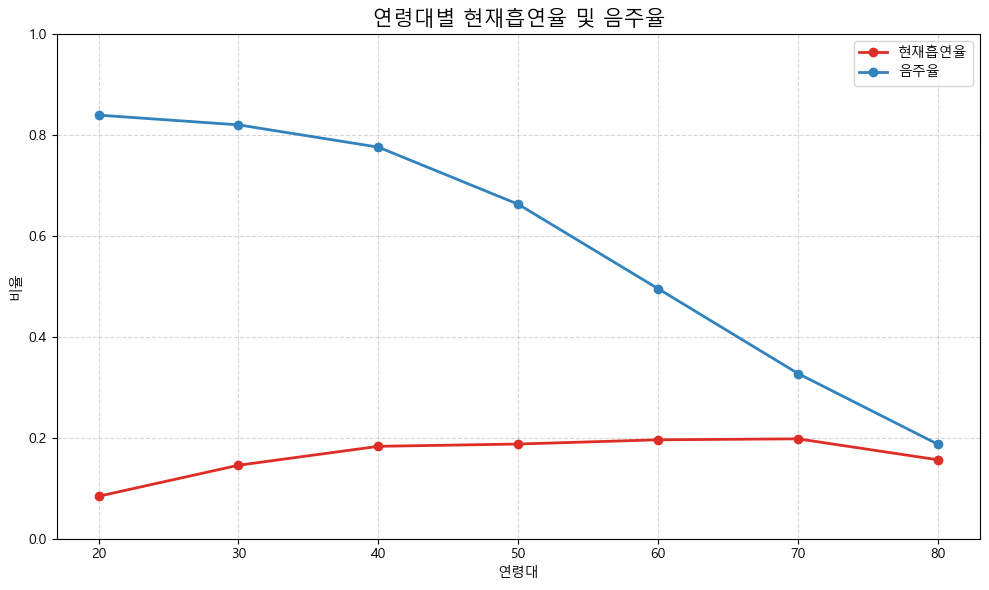

In [71]:
# 연령대 정렬용
연령대_순서 = ['20', '30', '40', '50', '60', '70', '80']
df['연령대'] = df['연령대'].astype(str)

# 현재흡연율 계산
current_smoke = df[df['흡연상태_라벨'] == '현재흡연'].groupby('연령대').size()
total_by_age = df.groupby('연령대').size()
current_smoke_rate = (current_smoke / total_by_age).reindex(연령대_순서).fillna(0)

# 음주율 계산
drink = df[df['음주여부_라벨'] == '음주'].groupby('연령대').size()
drink_rate = (drink / total_by_age).reindex(연령대_순서).fillna(0)

plt.figure(figsize=(10, 6))

# 현재흡연율 선
plt.plot(
    current_smoke_rate.index,
    current_smoke_rate.values,
    label='현재흡연율',
    color='#de2d26',  # 진한 빨강
    marker='o',
    linewidth=2
)

# 음주율 선 (실선으로 변경)
plt.plot(
    drink_rate.index,
    drink_rate.values,
    label='음주율',
    color='#3182bd',  # 진한 파랑
    marker='o',
    linewidth=2
)

plt.title('연령대별 현재흡연율 및 음주율', fontsize=15)
plt.xlabel('연령대')
plt.ylabel('비율')
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [72]:
chol_cols = ['총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤']
chol_df = df[df['콜레스테롤검사'] == 1].copy()

chol_df['연령대'] = chol_df['연령대'].astype(str)
연령대_순서 = ['20', '30', '40', '50', '60', '70', '80']

chol_by_age = chol_df.groupby('연령대')[chol_cols].mean()
chol_by_age = chol_by_age.reindex(연령대_순서)

plt.figure(figsize=(12, 6))
for col in chol_cols:
    plt.plot(
        chol_by_age.index,
        chol_by_age[col],
        label=col,
        marker='o',
        linewidth=2,
        color=color_col[col]  # 색상 고정
    )

plt.title('연령대별 콜레스테롤 관련 수치 (검사자 기준)', fontsize=15)
plt.xlabel('연령대')
plt.ylabel('수치 (mg/dL)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='항목')
plt.tight_layout()
plt.show()

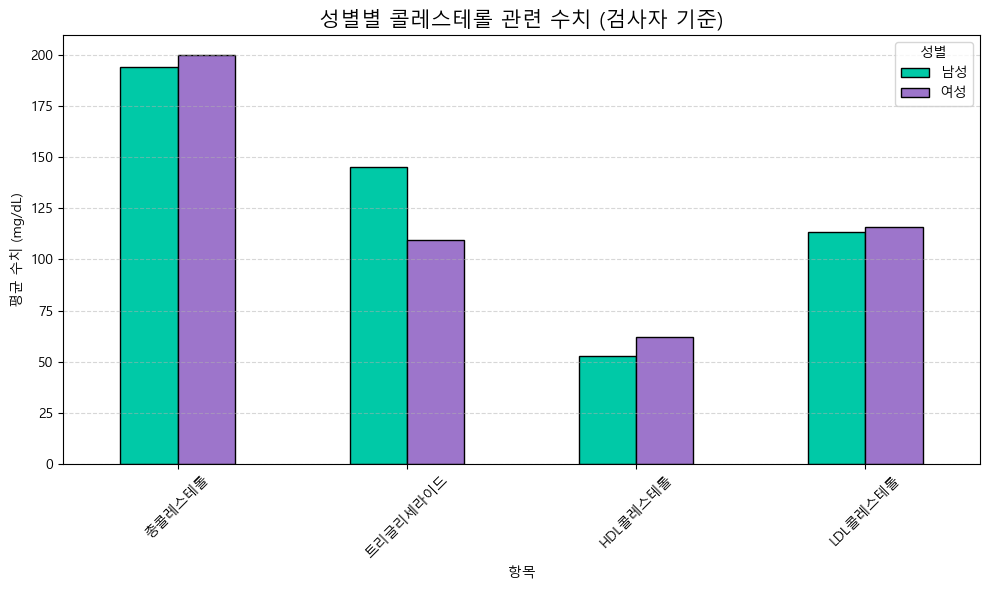

In [73]:
chol_df['성별'] = chol_df['성별코드'].map({1: '남성', 2: '여성'})
chol_by_gender = chol_df.groupby('성별')[chol_cols].mean()

chol_by_gender.T.plot(
    kind='bar',
    figsize=(10, 6),
    color=['#00C9A7', '#9D75CB'],  # 남성: 민트, 여성: 보라
    edgecolor='black'
)

plt.title('성별별 콜레스테롤 관련 수치 (검사자 기준)', fontsize=15)
plt.xlabel('항목')
plt.ylabel('평균 수치 (mg/dL)')
plt.xticks(rotation=45)
plt.legend(title='성별')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [80]:
cols_to_plot = [
    '신장(5cm단위)', '체중(5kg단위)', '허리둘레',
    '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드',
    'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '혈청크레아티닌',
    '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피'
]

df_melted = df[cols_to_plot].melt(var_name='항목', value_name='값')

plt.figure(figsize=(20, 8))
sns.boxplot(data=df_melted, x='항목', y='값', palette='Set3')

plt.title('건강검진 주요 항목 분포 (박스플롯)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylabel('수치')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [81]:
group_1 = ['신장(5cm단위)', '체중(5kg단위)', '허리둘레', '수축기혈압', '이완기혈압']
group_2 = ['식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤']
group_3 = ['혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피']
group_4 = ['혈색소', '요단백']

def draw_boxplot(cols, title):
    melted = df[cols].melt(var_name='항목', value_name='값')
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=melted, x='항목', y='값', palette='Set3')
    plt.title(title, fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

draw_boxplot(group_1, '① 체형 및 혈압 관련 항목 분포')
draw_boxplot(group_2, '② 혈당 및 콜레스테롤 항목 분포')
draw_boxplot(group_3, '③ 간기능 및 크레아티닌 항목 분포')
draw_boxplot(group_4, '④ 혈색소 및 요단백 분포')

In [83]:
cols_to_plot = [
    '신장(5cm단위)', '체중(5kg단위)', '허리둘레', '수축기혈압',
    '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드',
    'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백',
    '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피'
]

# 서브플롯 설정
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
axes = axes.flatten()  # 1차원으로 만들어서 인덱싱 쉽게

for i, col in enumerate(cols_to_plot):
    sns.boxplot(
        y=df[col],
        ax=axes[i],
        color=color_col.get(col, '#a6bddb')  # 색상 고정
    )
    axes[i].set_title(col, fontsize=11)
    axes[i].set_ylabel('')
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)

# 남은 subplot 숨기기 (혹시 항목 수가 16보다 적을 경우 대비)
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.suptitle('건강검진 주요 지표별 박스플롯 (4×4)', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()